## EAS 503 Homework 3 Submission
Name - Shreyas Prashant Kulkarni

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - October 31, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 2 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


In [5]:
#Enter your solution here
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
df=pd.read_csv("/home/shreyas/Downloads/HW 3/chicago_crime_data.csv")
df1=pd.read_csv("/home/shreyas/Downloads/HW 3/primary_type_id.csv")
merged = df.merge(df1, on='Primary Type ID',how='left')
merged.to_csv("final_output.csv", index=False)
final=pd.read_csv("final_output.csv")
final=final.rename(columns = {'Primary Type':'Primary_Type'})
a=final.groupby('Primary_Type').Primary_Type.count()>=10000
a1=a.to_frame()
a1.columns=['HFD']
print(a1.columns)
#final=final.merge(a1,on='Primary_Type')
a1['Primary_Type']=a1.index
final=pd.merge(final,a1)
final1=final[(final.HFD==True)]
final1['Date'] = pd.to_datetime(final1['Date'])
final1.index=final1['Date']



Index(['HFD'], dtype='object')


/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


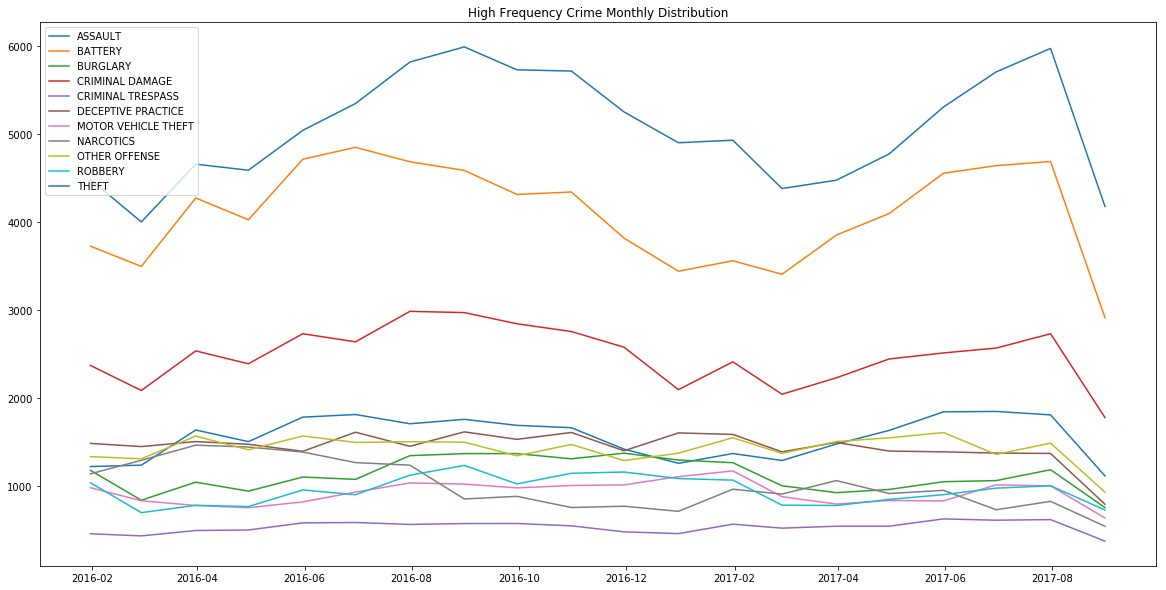

In [42]:
gb = final1.groupby('Primary_Type')    
l=[gb.get_group(x) for x in gb.groups]
plt.figure(figsize=(20,10))
q=[]
for i in range(0,len(l)):
    count=l[i]['Date'].groupby(pd.TimeGrouper(freq='M')).count()
    count1=count.to_frame()
    count1.columns=['DateFreq']
    count1['Date']=count1.index
    dateList=count1['Date'].tolist()
    dateFreqList=count1['DateFreq'].tolist()
    q.append(l[i]['Primary_Type'].iloc[0])
    
    plt.plot(dateList,dateFreqList)
plt.title('High Frequency Crime Monthly Distribution')
plt.legend(q)
plt.show()   

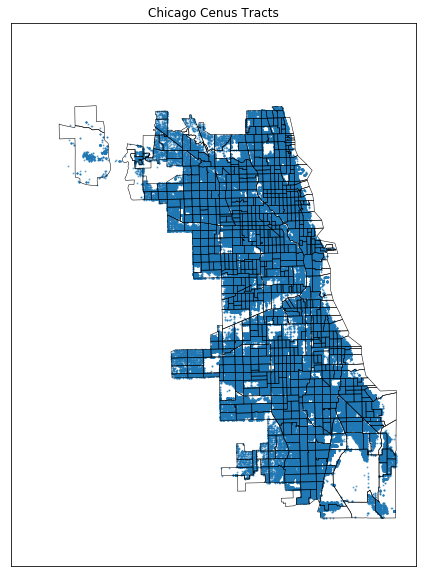

In [19]:
fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons = final1['Longitude'].tolist()
lats = final1['Latitude'].tolist()
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.5,s=1)
#m.plot(x, y, 'bo', markersize=0.5)
plt.title("Chicago Cenus Tracts")
plt.show()

### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

Red Line - User Defined Function
Green Line - In-built Function


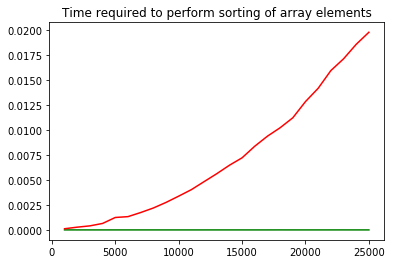

In [35]:
#sorting
import random as random
import time as time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
slist=[]
ns=[]
nps=[]
for i in range(1000,25001,1000):
    for j in range(0,i):
        slist.append(random.randint(1,100))
    t1=time.time()
    slist.sort
    t2=time.time()
    a=np.array(slist)
    t3=time.time()
    np.sort(a)
    t4=time.time()
    ns.append(t2-t1)
    nps.append(t4-t3)
x=list(range(1000,25001,1000))
plt.plot(x,ns,c='Green')
plt.plot(x,nps,c='Red')
plt.title('Time required to perform sorting of array elements')
plt.show 
print("Red Line - User Defined Function")
print("Green Line - In-built Function")
        


Red Line - User Defined Function
Green Line - In-built Function


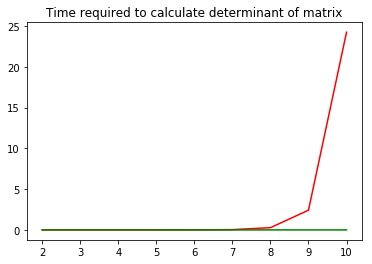

In [38]:
#determinant
import random as random
import time as time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
def main():
    fd=[]
    npd=[]
    for s in range(2,11):
        t= [[ 0 for i in range(s) ] for j in range(s)]
        for d1 in range(s):
            for d2 in range(s):
                t[d1][d2]= random.randint(0,5)
    #print(t)
        t1=time.time()
        det(t)
    #print(a)
        t2=time.time()
        fd.append(t2-t1)
        t4=time.time()
        d=np.linalg.det(t)
        t3=time.time()
    #print(d)
        npd.append(t3-t4)
    x=list(range(2,11))
    plt.plot(x,fd,c='Red')
    plt.plot(x,npd,c='Green')
    plt.title('Time required to calculate determinant of matrix')
    print("Red Line - User Defined Function")
    print("Green Line - In-built Function")

    plt.show
    
def det(mat):
    n=len(mat)
    if (n>2):
        i=1
        t=0
        sum=0
        while t<=n-1:
            dc={}     #Creates dictionary of elements of matrix with size n-1
            t1=1
            while t1<=n-1:
                m=0
                dc[t1]=[]
                while m<=n-1:
                    if (m==t):
                        u=0
                    else:
                        dc[t1].append(mat[t1][m])
                    m+=1
                t1+=1
            l1=[dc[x] for x in dc]
            sum+=i*(mat[0][t])*(det(l1))   #multiplies minor to the (0,t)th element and add them for t varries (0,t)
            i=i*(-1)        #changes sign of the multiplier in the every step
            t+=1
        return sum
    else:
        return (mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0])
main()

Red Line - User Defined Function
Green Line - In-built Function


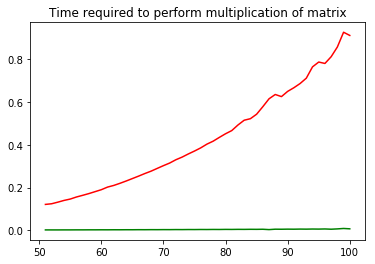

In [37]:
#Matrix Multiplication
import random
import time as time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
nm=[]
npm=[]
for s1 in range(51,101):
    mat= [[ 0 for i in range(s1) ] for j in range(s1)]
    for d1 in range(s1):
        for d2 in range(s1):
            mat[d1][d2]= random.randint(0,5)
    #print(table)
    t1=time.time()
    mul=np.matmul(mat,mat)
    t2=time.time()
    #print(mul)
    mul1= [ [ 0 for a in range(s1) ] for b in range(s1) ]
    for i in range(0,s1):
        for j in range(0,s1):
            for k in range(0,s1):
                mul1[i][j]+=mat[i][k]*mat[k][j]
#print(mul1)
    t3=time.time()
    nm.append(t2-t1)
    npm.append(t3-t2)
x=list(range(51,101))
plt.plot(x,nm,c='Green')
plt.plot(x,npm,c='Red')
plt.title('Time required to perform multiplication of matrix')
plt.show  
print("Red Line - User Defined Function")
print("Green Line - In-built Function")